## Import Libraries

In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns 

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics 

In [128]:
#colab
#from google.colab import files

from sklearn.decomposition import PCA,KernelPCA # Principal Component Analysis module
from sklearn.manifold import TSNE, MDS # TSNE module

## Load Data

In [129]:
# Using the Breast Cancer Wisconsin (Diagnostic) Data Set
# available at https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

data_path = "./kaggle EDA/data.csv"
df = pd.read_csv(data_path,header = 0)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Data cleaning

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Removing null values

In [131]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
print('Are there null values? ',df.isnull().values.any())

Are there null values?  False


Observing the number of samples in the two classes and the percentages

Number of Benign	:	  357
Number of Malignant	:	  212
Percentage Benign	:	  62.74 %
Percentage Malignant	:	  37.26 %


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


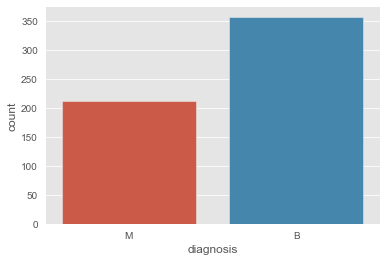

In [132]:
sns.countplot(df['diagnosis'],label="Count")    
B, M = df['diagnosis'].value_counts()

print('Number of Benign\t:\t ',B)
print('Number of Malignant\t:\t ',M)
print('Percentage Benign\t:\t % 2.2f %%' % (B/(B+M)*100))
print('Percentage Malignant\t:\t % 2.2f %%' % (M/(B+M)*100))

In [133]:
df_features = df[df.columns[1:31]]
y =   df[df.columns[0]]
df_features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

## Checking for outliers

After a StandardScaler, in order to easily compare the data, I want to determine if there are any outliers in the data set.

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_features.values)
df_features_scaled = pd.DataFrame(scaled_features, index=df_features.index, columns=df_features.columns)

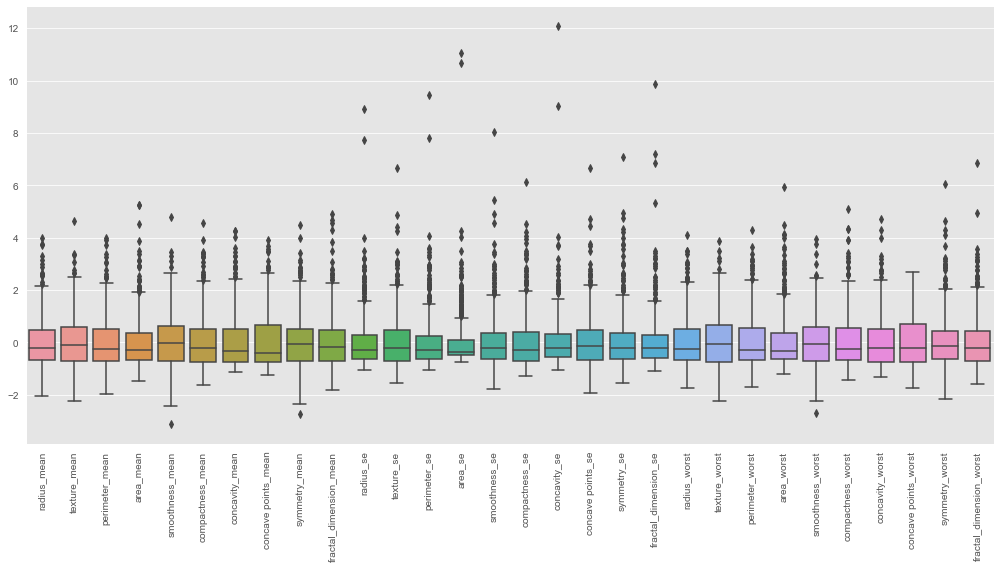

In [135]:
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
plt.xticks(rotation=90)  
plt.tight_layout()

A robust statistical approach would have considered outliers all the values plotted over the value 3 (or 2.5) on the y axis. however, given the limited range of data distribution (from about -2.5 to about +11) and the availability of data is not very high (only 569 observations), it has been preferred to use an "visual" approach for detection (based on density of the points above a specific threshold) and removal of the outliers.

I will consider only the observations plotted under standard deviation of 6 as valud (others being very far from the mean).

## Note: 
Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid Before removing them we should discuss with domino experts to understand why these points are not valid (for example, the measuring equipment failed, the measurement method was unreliable for some reason, there were contaminants, etc ... ).

(557, 30)


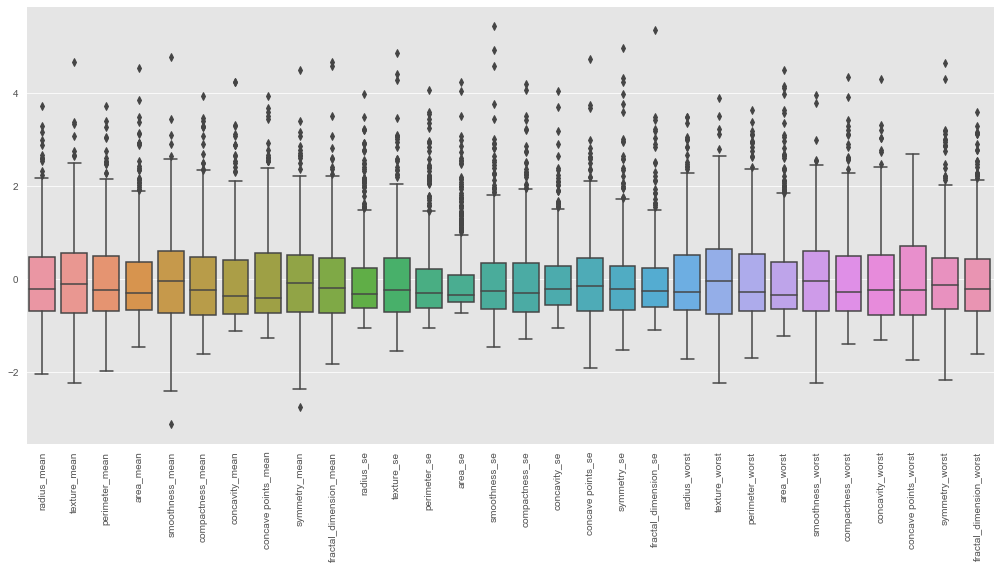

In [136]:
df_features_clean=df_features_scaled[df_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
dfc_mean = df_features_clean.mean()
df_features_clean = df_features_clean.fillna(dfc_mean)
 
print(df_features_clean.shape)
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_clean )
plt.xticks(rotation=90)  
plt.tight_layout()

Number of Malignant              :  212
Number of Benign                 :  357
Number of Malignant              :  37.26 %
Number of Benign                 :  62.74 %
Number of Malignant (no outliers):  212
Number of Benign    (no outliers):  357
Number of Benign    (no outliers):  62.74 %
Number of Malignant (no outliers):  37.26 %


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


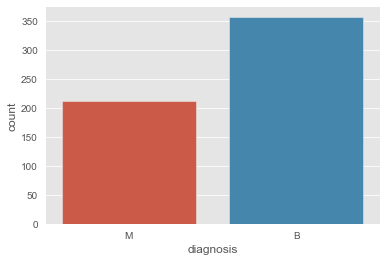

In [137]:
df_features_y_clean = pd.concat([df_features_clean, y], axis=1)
df_features_y_clean.reindex([df_features_clean.index])

df_features_clean = df_features_y_clean.iloc[:,0:30]
df_y = df_features_y_clean.iloc[:,30]

B, M = df['diagnosis'].value_counts()   
B_c, M_c = df_features_y_clean['diagnosis'].value_counts()
sns.countplot(df_features_y_clean['diagnosis'],label="Count")    

print('Number of Malignant              : ',M)
print('Number of Benign                 : ',B)
print('Number of Malignant              : % 2.2f %%' % (M/(B+M)*100))
print('Number of Benign                 : % 2.2f %%' % (B/(B+M)*100))
print('Number of Malignant (no outliers): ',M_c)
print('Number of Benign    (no outliers): ',B_c)
print('Number of Benign    (no outliers): % 2.2f %%' % (B_c/(B_c+M_c)*100))
print('Number of Malignant (no outliers): % 2.2f %%' % (M_c/(B_c+M_c)*100))

After removing of the outliers, the dataset is composed as follows:

    Total observations of the dataset: 557;
    Malignant Class: 205;
    Benign Class: 352.
    The proportion is maintained

## Correlation between features
We study the correlation dividing the features into three groups: (The mean, standard error and "worst" or largest )

In [138]:
df_features_mean= df_features[df_features.columns[0:10]]
df_features_se= df_features[df_features.columns[10:20]]
df_features_worst = df_features[df_features.columns[20:30]]

<AxesSubplot:>

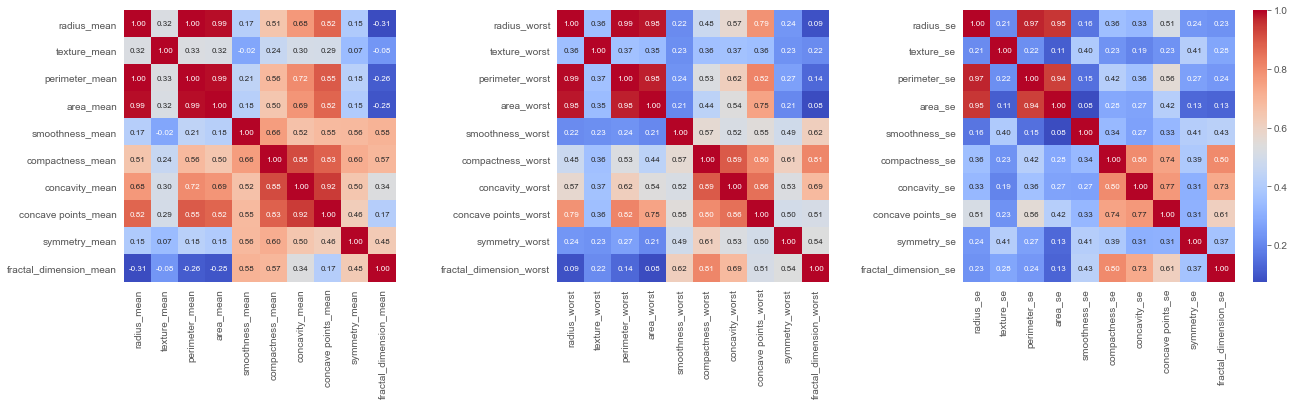

In [139]:
plt.figure(figsize=(22,5))
plt.subplot(1, 3, 1)
sns.heatmap( df_features_mean.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 2)
sns.heatmap(df_features_worst.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')
plt.subplot(1, 3, 3)
sns.heatmap(df_features_se.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

radius, area and perimeter (mean, the wrost, and the error standard) are closely correlated to each other, the same for the characteristics of compactness, concave points and concavity.

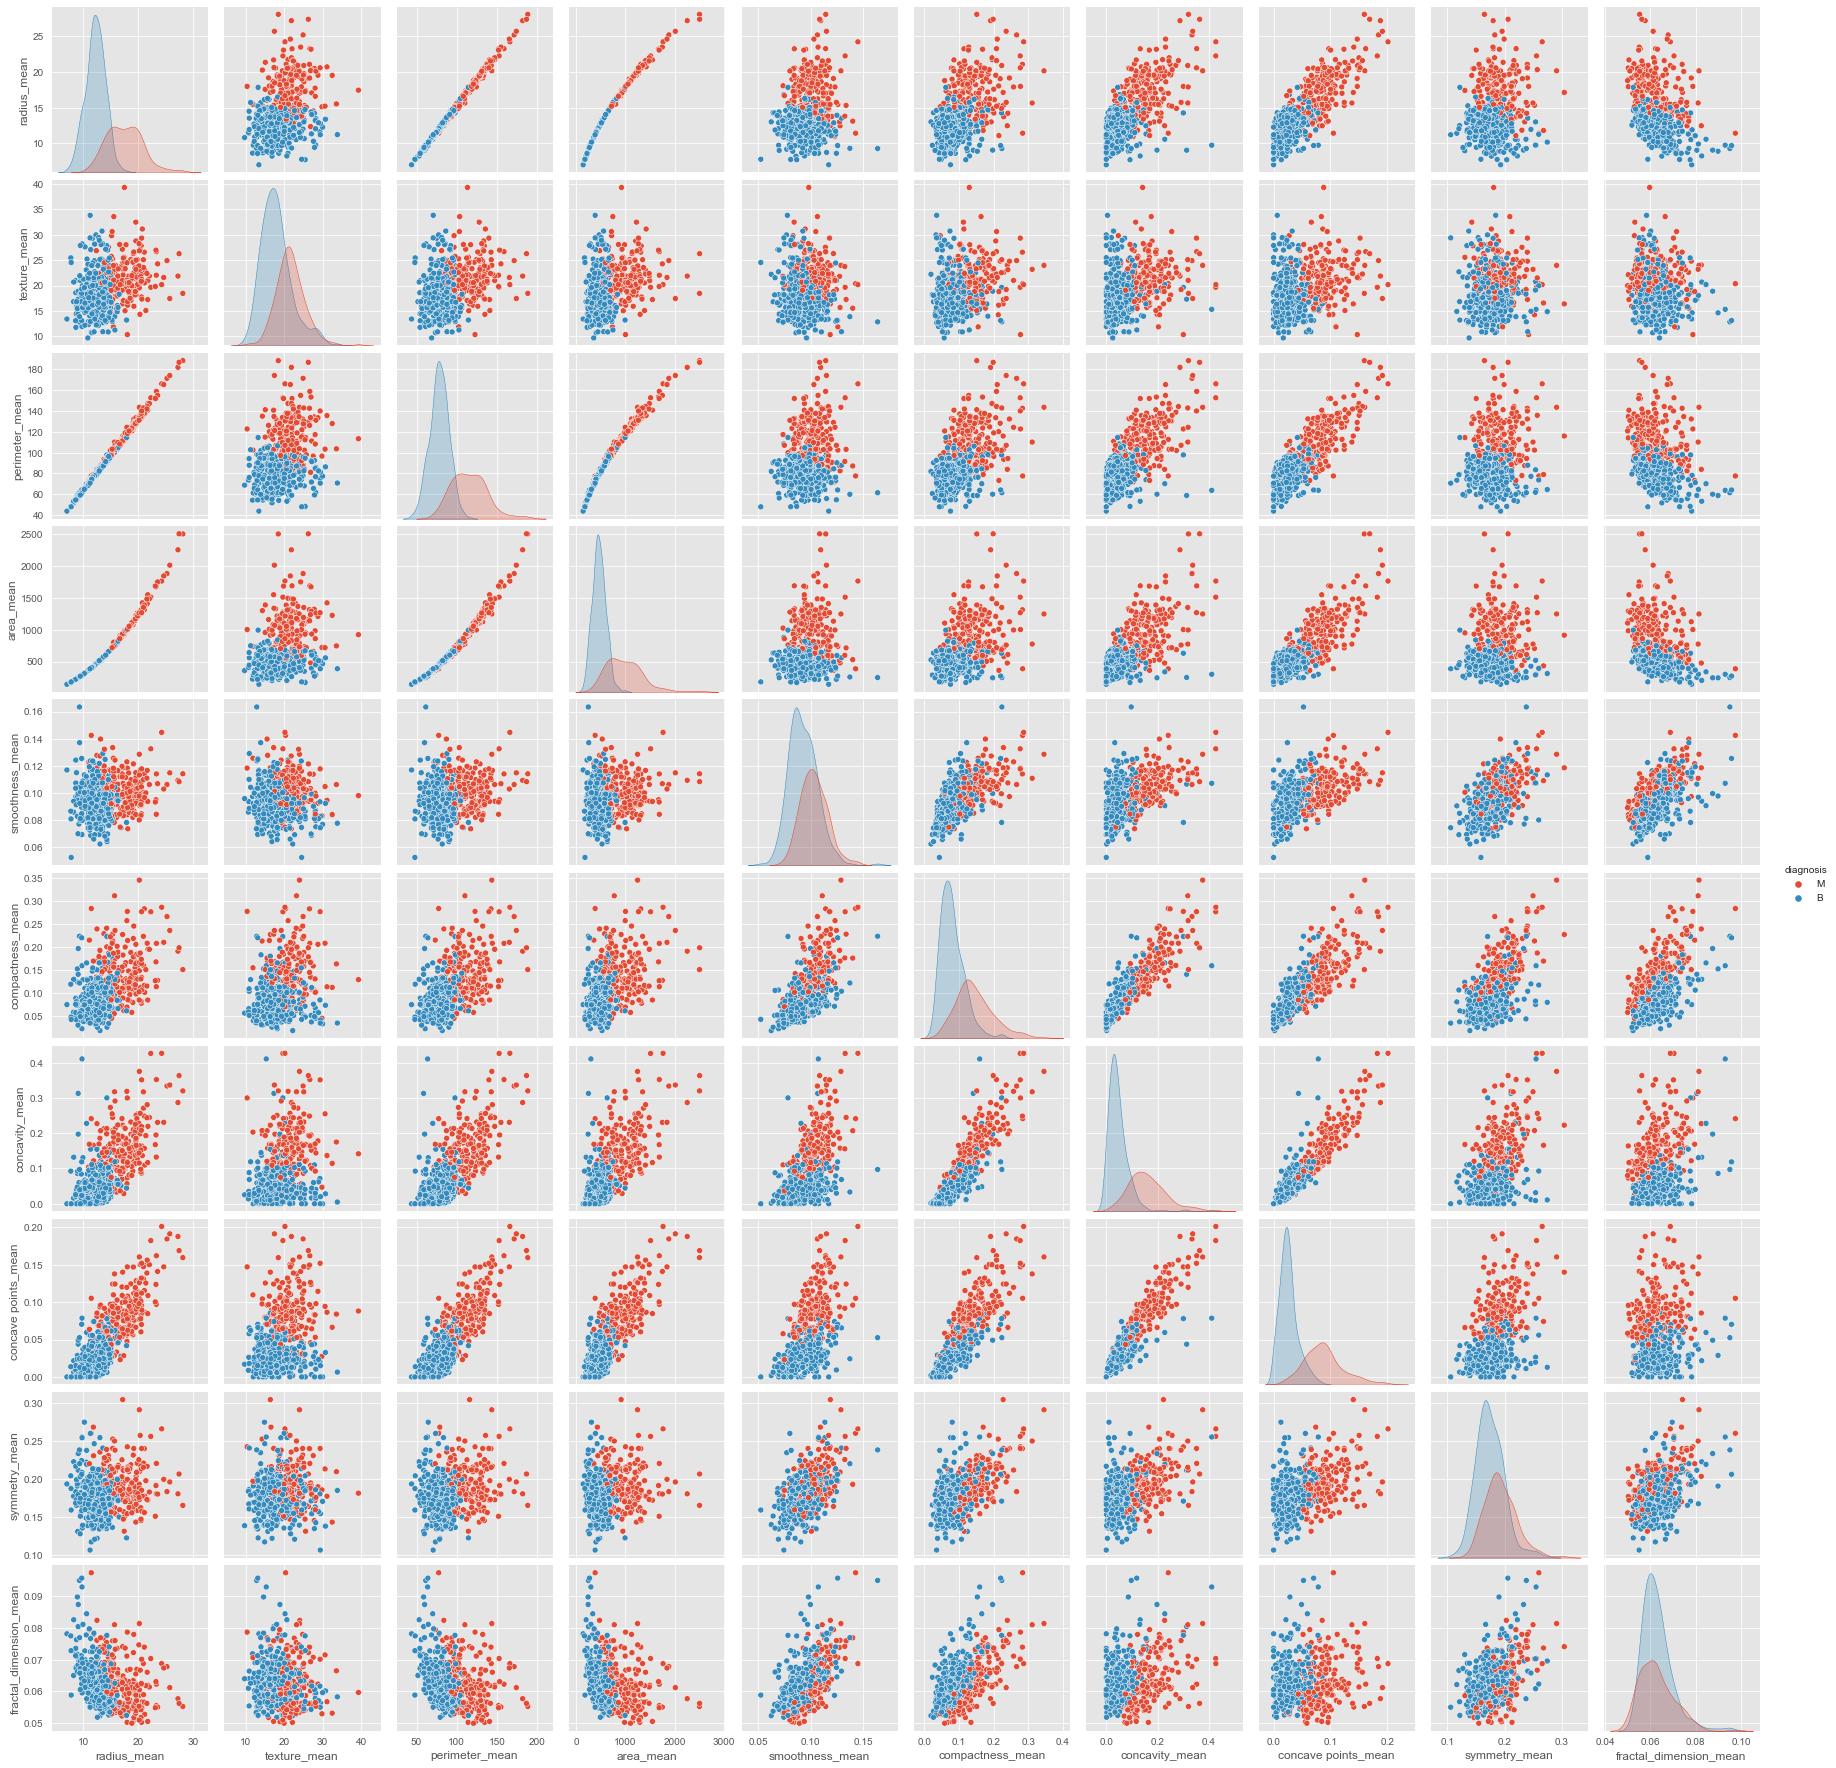

In [140]:
sns.pairplot(  pd.concat([df_features_mean,y], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))

Observations: The radius, area and perimeter characteristics are closely related and have higher values and binomial distribution. In malignant tumors, the benign tumors have smaller cell nuclei and Gausssian distribution. HWHM is bigger in the class of malignants, but broadening is narrower in the benign

In [141]:
# Reorganising
order_cols = ['radius_mean', 'radius_se', 'radius_worst',
 'texture_mean', 'texture_se', 'texture_worst',
 'perimeter_mean', 'perimeter_se', 'perimeter_worst',
 'area_mean','area_se','area_worst',
 'smoothness_mean', 'smoothness_se', 'smoothness_worst',
 'compactness_mean', 'compactness_se', 'compactness_worst',
 'concavity_mean', 'concavity_se', 'concavity_worst',
 'concave points_mean','concave points_se','concave points_worst',
 'symmetry_mean', 'symmetry_se', 'symmetry_worst',
 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst','diagnosis']

df_features_y_clean = df_features_y_clean[order_cols]

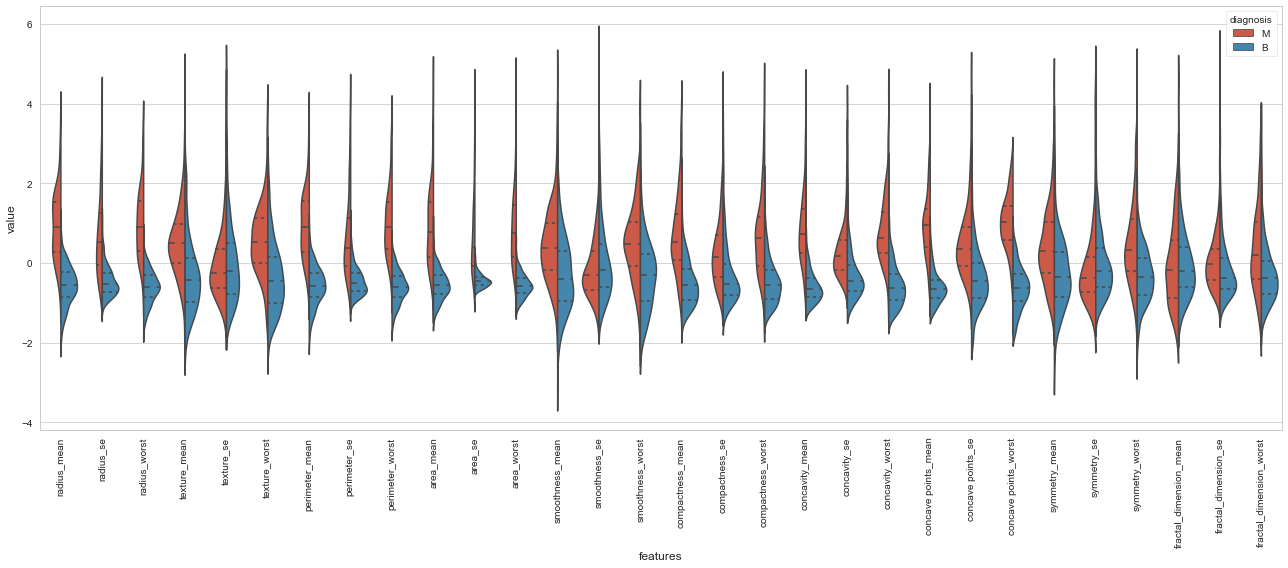

In [142]:
# Violinplot
# Blue = Malignant
# Orange = Benign
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
data = pd.melt(df_features_y_clean,id_vars="diagnosis",var_name="features", value_name='value')
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90) 
plt.tight_layout()

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the 

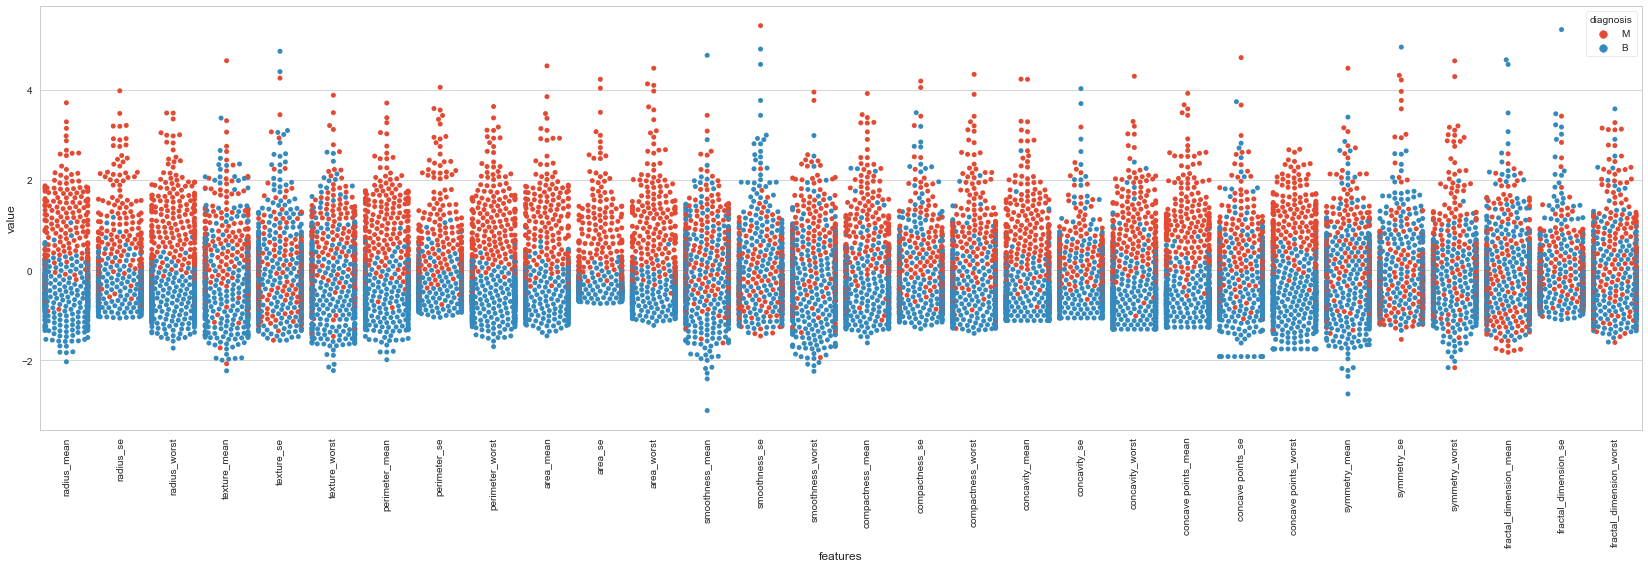

In [143]:
# Swarmplot
# Blue = Malignant
# Orange = Benign
plt.figure(figsize=(23,8))
data = pd.melt(df_features_y_clean,id_vars="diagnosis",var_name="features", value_name='value')
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90) 
plt.tight_layout()

## Feature engineering

I proceeded to select the features that are most discriminating (see swarmplot) among the most correlated features (see correlation plot). The following considerations were therefore made,

    from the correlated group [compactness_se, concavity_se concave pointsse], I select compactness_se.

    from the correlated group [compactness_worst, concavity_worst and concave], I select points_worst concavity_point_worst)

    from the correlated group [concavity_mean, compactness_mean, concavity_mean and concave points_mean] , I select concavity_mean)

    from the correlated group [radius_worst, area_worst, perimeter_worst, radius_worst ] , I select radius_worst)

    from the correlated group [perimeter_mean, area_mean, perimeter_mean, radius_mean ] , I select perimeter_worst)

    from the correlated group [area_se, area_se, perimeter_se, radius_se] , I select area_se)


In [144]:
my_selected_features = ['compactness_se', 
                        'radius_worst', 'perimeter_mean', 'area_se',
                         'texture_mean', 'texture_se', 'texture_worst',
                        'concavity_mean', 'concavity_se', 'concavity_worst', 'concave points_mean','concave points_se','concave points_worst', 
                        'symmetry_mean', 'symmetry_se', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

df_my_selected_features = df_features_clean[my_selected_features]

Although still under data exploration, once our dataset was simplified, it was already possible to obtain useful information. Therefore, a decision tree was created (depth 4 and Gini criterion), from the observation of which it was possible to make some important considerations.

In [145]:
# !pip install graphviz
# !pip install -q pydot

In [146]:
from sklearn import tree
import graphviz 

def plot_decision_tree(model, columns):
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=columns,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
  
    
def plot_importances_features(model, columns):
  indices = np.argsort(model.feature_importances_)[::-1]
  feat_imp = pd.DataFrame({'Feature':columns.values[indices],
                        'Feature ranking':model.feature_importances_[indices]})
  plt.rcParams['figure.figsize']=(8,12)
  sns.set_style('whitegrid')
  ax = sns.barplot(x='Feature ranking', y='Feature', data=feat_imp)
  ax.set(xlabel='Feature ranking')
  plt.show()

Observing the decision tree with our custom features

In [147]:
# check for NaN

# print("original values:")
# print(df_my_selected_features.values)
print("pre cleaning check for NaN:")
print(np.isnan(np.min(df_my_selected_features.values)))

#finding NaN positions

print("index for NaN values:")
np.where(np.isnan(df_my_selected_features.values))
# print(np.argwhere(np.isnan(df_my_selected_features.values)))

df_mean = df_my_selected_features.mean()
# print(df_mean)
df_my_selected_features = df_my_selected_features.fillna(df_mean)

print("post cleaning check for NaN:")
print(np.isnan(np.min(df_my_selected_features.values)))

pre cleaning check for NaN:
True
index for NaN values:
post cleaning check for NaN:
False


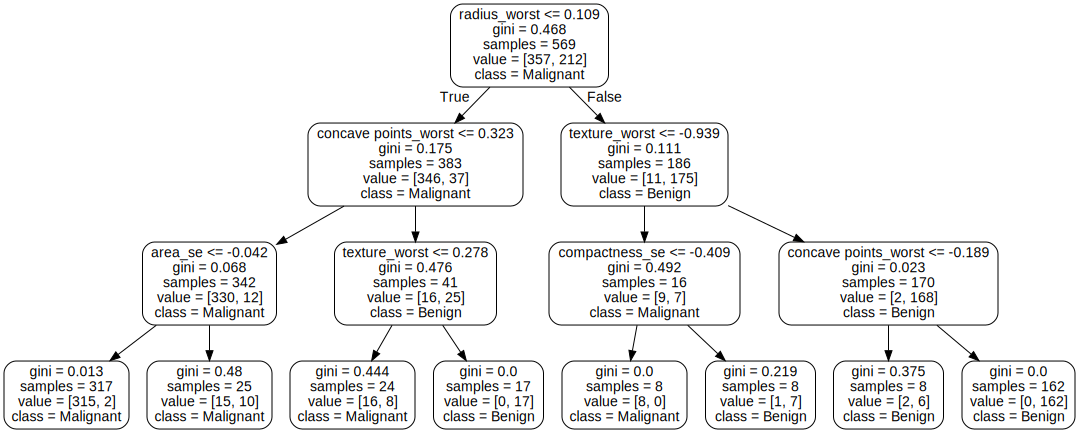

In [148]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)  

clf1.fit(df_my_selected_features.values, df_y.values)
plot_decision_tree(clf1,my_selected_features)


the first consideration to make is that, as we hypothesized, the size of the nucleus is very discriminating for the purposes of classification;

In the decision tree, you can see the role of individual features in discriminating tumors.


## Feature Selection

Random Forests are often used for feature selection in a data science workflow.

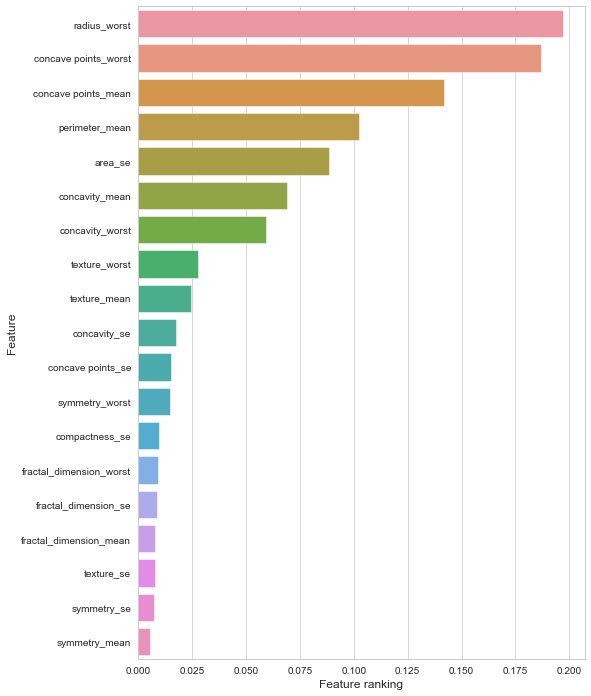

In [149]:
model = RandomForestClassifier(n_estimators=1000)
#Fit the model:
model.fit(df_my_selected_features.values, df_y.values)
plot_importances_features(model,df_my_selected_features.columns) # on my_selected_features

the most important features for reduced dataset are: radius_worst, concave points_worst,radius_worst,concave points_mean, perimeter_mean, concavity_mean.


## PCA,TSE, MDS Dimensionality Reduction

Continuing the exploratory process aimed at understanding how to simplify the dataset, without losing relevant information, the following processes were applied: PCA, Cosine PCA, TSNE and MDS, which are techniques for reducing complexity

In [150]:
# Turn dataframe into arrays
X = df_features_clean.values
x_mean = df_features_clean.mean()
X = np.where(np.isnan(X), x_mean, X)

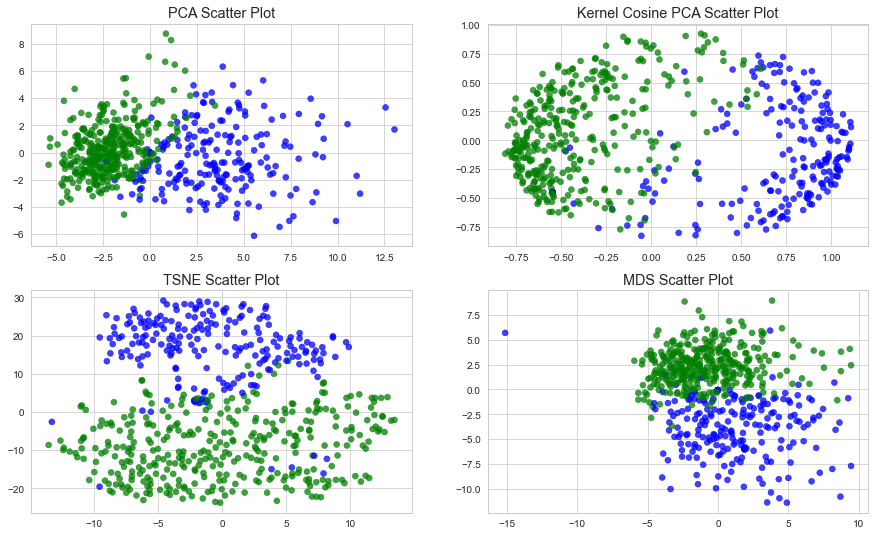

In [151]:
# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca_2d = PCA(n_components=2)
pca_2d_results = pca_2d.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

pca_cos_2d = KernelPCA(n_components=2, kernel = 'cosine')
pca_cos_2d_results = pca_cos_2d.fit_transform(X)


mds = MDS(2, max_iter=100, n_init=1)
mds_results = mds.fit_transform(X)

# Plot the TSNE and PCA visuals side-by-side
cmap = {'B':'green','M':'blue'}
fig = plt.figure(figsize = (15,9))


plt.subplot(2, 2, 1)
plt.title('PCA Scatter Plot')
plt.scatter( pca_2d_results[:,0], pca_2d_results[:,1], c = [cmap[x] for x in df_y.values] ,alpha=0.75)

plt.subplot(2, 2, 2)
plt.title('Kernel Cosine PCA Scatter Plot')
plt.scatter( pca_cos_2d_results[:,0], pca_cos_2d_results[:,1], c =[cmap[x] for x in df_y.values] ,alpha=0.75)

plt.subplot(2, 2, 3);
plt.title('TSNE Scatter Plot')
plt.scatter(tsne_results[:,0], tsne_results[:,1],  c =[cmap[x] for x in df_y.values] , alpha=0.75)


plt.subplot(2, 2, 4)
plt.title('MDS Scatter Plot')
plt.scatter(mds_results[:,0], mds_results[:,1],  c =[cmap[x] for x in df_y.values] , alpha=0.75)

plt.show()



From a first observation of the results of the plots, it can be deduced that the data are linearly separable and therefore a linear model could be an excellent solution to solve a classification problem.

In the PCA, the next question is “how many principal components are we going to choose for our new feature subspace?

Another question that arose was how many main components we should have chosen for our new function subspace. Usually, in order to identify the number of components to be used, we try to follow the two criteria together.

According to the first criterion, a number of principal components must be considered such that they take into account a sufficiently high percentage of total variance (at least 70%, for example). When defining the minimum percentage of acceptable variance, the number of original variables should be taken into account, so that as the number of variables increases, a lower percentage of explained variance may be accepted.


The next question is “how many principal components are we going to choose for our new feature subspace?” 
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components.


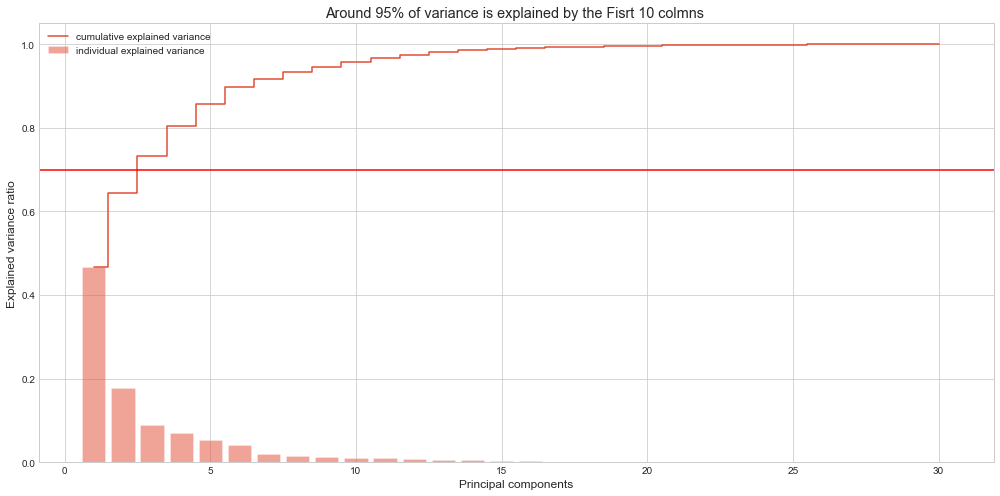

In [152]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)


with plt.style.context('seaborn-whitegrid'):
    plt.figure(1, figsize=(14, 7))
    plt.bar(range(1,31,1), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1,31,1),pca.explained_variance_ratio_.cumsum(), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.title("Around 95% of variance is explained by the Fisrt 10 colmns ");
    plt.legend(loc='best')
    plt.axhline(y=0.7, color='r', linestyle='-')
    plt.tight_layout()

The second criterion uses a graph called scree-graph of eigenvalues as a function of the number of principal components. As the eigenvalues are decreasing, the graph takes the form of a broken graph with always negative slope. Analyzing the graph it will be possible to notice a point in which a sudden variation of slope occurs, in correspondence with which the number k of principal components to consider is identified.

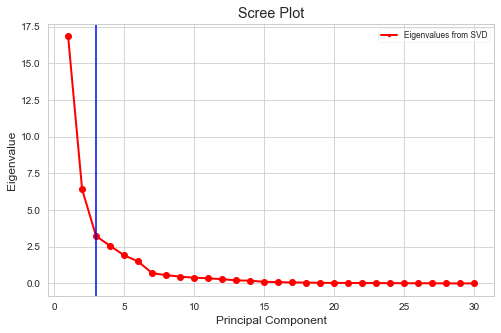

In [153]:
sns.set_style('whitegrid')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = 30


A = X
U, S, V = np.linalg.svd(X) 
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
# leg.draggable(state=True)
plt.axvline(x=3, color='b', linestyle='-')
plt.show()

A good number of principal component is 3 with the explained variance of 74%

In [154]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)
    return important_features

Now, I want to know what are the most import features for PCA

In [155]:
pca = PCA(n_components=2, svd_solver='full')
pca_2d_results = pca.fit_transform(X)

components = pd.DataFrame(pca.components_ , columns = df_features.columns, index=[1, 2])

important_features = get_important_features(pca_2d_results, pca.components_, df_features.columns.values)

Features by importance:
 [(3.7030104834923536, 'radius_worst'), (3.688424241525174, 'perimeter_worst'), (3.6414282535942064, 'radius_mean'), (3.6250583282685582, 'perimeter_mean'), (3.577575194586405, 'area_worst'), (3.5496257886602347, 'area_mean'), (3.513816699244314, 'concave points_mean'), (3.4730458401543887, 'compactness_mean'), (3.4473451813814986, 'concave points_worst'), (3.429312447995218, 'fractal_dimension_mean'), (3.372962828413357, 'concavity_mean'), (3.106810883023906, 'concavity_worst'), (3.0689473213354654, 'compactness_worst'), (2.9487670436359323, 'fractal_dimension_worst'), (2.80319315335408, 'smoothness_mean'), (2.721354679441753, 'compactness_se'), (2.5964325804097816, 'symmetry_mean'), (2.595405241368178, 'smoothness_worst'), (2.5385869870929665, 'perimeter_se'), (2.530644674026419, 'radius_se'), (2.491796514885088, 'concave points_se'), (2.4874799351532353, 'area_se'), (2.3495246841474784, 'fractal_dimension_se'), (2.1149439019093625, 'smoothness_se'), (2.078630

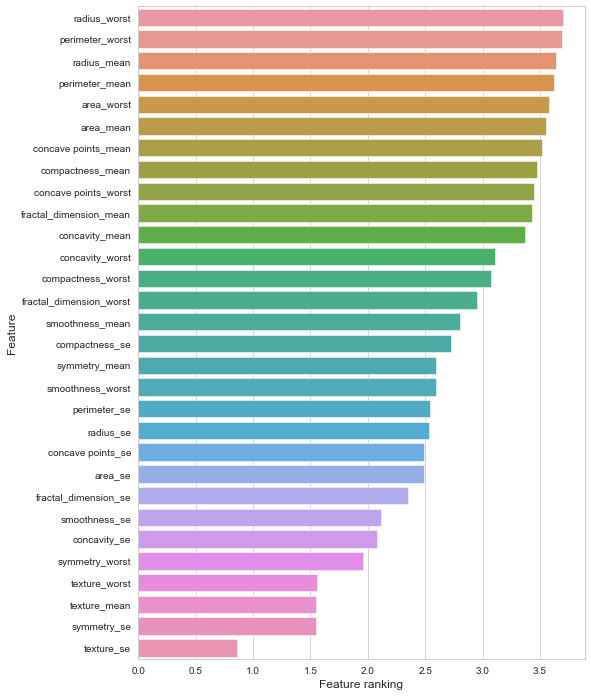

In [156]:
r,f = zip(*important_features)

feat_imp = pd.DataFrame({'Feature':f,
                        'Feature ranking':r})
plt.rcParams['figure.figsize']=(8,12)
sns.set_style('whitegrid')
ax = sns.barplot(x='Feature ranking', y='Feature', data=feat_imp)
ax.set(xlabel='Feature ranking')
plt.show()

This funtion will project your original features onto your principal component feature-space, so that you can visualize how "important" each one was in the multi-dimensional scaling

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns, lenght):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """
    
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        if math.sqrt(xvector[i]**2 + yvector[i]**2) >lenght: # solo vettori maggiori di lenght
          plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
          plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.45)

    return ax

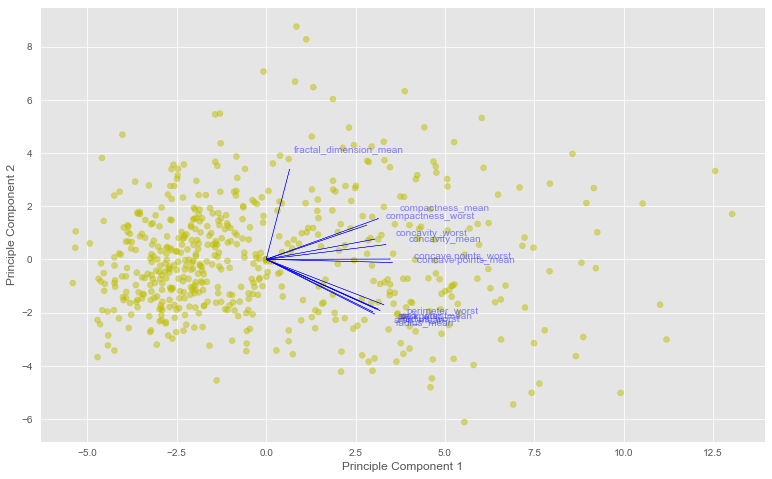

In [158]:
plt.figure(figsize=(13,8))


ax = draw_vectors(pca_2d_results, pca.components_, df_features.columns.values,3.0)
#ax.set_ylim([-3,-1])

T_df = pd.DataFrame(pca_2d_results)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'


plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

The most important features for PCA are: radius worst, perimeter worst, perimeter mean, radius mean and area worst

In [165]:
from sklearn.metrics import roc_curve, auc


#roc curve_model
def roc_curve_model(model,x_test,y_test, algo_name=''):
  y_prob = model.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilitie
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(false_positive_rate, true_positive_rate)

  plt.figure(figsize=(5,5))
  plt.title('ROC '.format(algo_name))
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC '+algo_name+'= %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  
  return plt

def evaluate_cv(xvalues,yvalues, algo):
    scores = cross_val_score(algo, xvalues ,yvalues, cv=10) #accuracy
    scores_recall = cross_val_score(algo, xvalues,yvalues, cv=10,scoring='recall')
    scores_f1 = cross_val_score(algo, xvalues,yvalues, cv=10,scoring='f1')
    scores_average_precision= cross_val_score(algo,xvalues,yvalues, cv=10,scoring='average_precision')
    print("Cross validation score           : ",scores.mean())  #accuracy
    print("Cross validation recall          : ",scores_recall.mean()) 
    print("Cross validation f1 score        : ",scores_f1.mean())     
    print("Cross validation precision score : ",scores_average_precision.mean())
    
    return scores_recall, scores

  # plot Classifires' performances on real data and PCA 3D 
def evalute_realdata_PCAreduction(algo, algo_name,npca=3, plot_cf=False):
    reduction = PCA(n_components=npca) # in EDA we found that 3 PC is a good value
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
   
    algo.fit(x_train_reduced, y_train)
    
    y_pred_reduced = algo.predict(x_test_reduced)
    
      
   
    roc_curve_model(algo,x_test_reduced,y_test,' PCA' )
   
    print("\t------\t Reduced Data "+algo_name+" \t-------")
    print("Confusion matrix PCA (3D):\n", confusion_matrix(y_test, y_pred_reduced))
    print(classification_report(y_test, y_pred_reduced))
    

    scores_recall_pca, scores_accuracy_pca = evaluate_cv(reduction.fit_transform(df_features.values) ,y.values,algo)
    
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    print("\n\t------\t Real Data "+algo_name+" \t-------")
    print("Confusion matrix :\n ", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    scores_recall, scores_accuracy = evaluate_cv(df_features.values ,y.values,algo)
    
     
    
    y_prob = algo.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilitie
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc)
    
    plt.legend()
  
    if plot_cf:
      fig, ax =  plot_confusion_matrix(conf_mat= confusion_matrix(y_test, y_pred_reduced))  #PCA
      ax.set_title("Confusion mat PCA")
      fig, ax =plot_confusion_matrix(conf_mat= confusion_matrix(y_test, y_pred))    #real data
      ax.set_title("Confusion mat Real ")

    return [scores_recall_pca, scores_accuracy_pca, scores_recall, scores_accuracy]
    
def plot_scores(scores, algo_name):
  n_groups = 2
  pca_means = (scores[0].mean(),scores[1].mean())
  real_means = (scores[2].mean(),scores[3].mean())
  pca_std = (scores[0].std(),scores[1].std())
  real_std = (scores[2].std(),scores[3].std())

  # create plot
  fig, ax = plt.subplots()
  index = np.arange(n_groups)
  bar_width = 0.35
  opacity = 0.8

  rects1 = plt.bar(index, pca_means, bar_width,
                   alpha=opacity,
                    yerr=pca_std,
                   color='b',
                   label='PCA 3D')

  rects2 = plt.bar(index + bar_width, real_means, bar_width,
                   alpha=opacity,
                    yerr=real_std,
                   color='g',
                   label='Real Data')
  for rects in [rects1,rects2]:
    for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,                
                   str(round((height)*100, 2))+'%',
                  ha='center', va='bottom')

  plt.xlabel('Metrics')
  plt.ylabel('Scores')
  plt.title('Scores '+algo_name)
  plt.xticks(index + bar_width, ('Recall', 'Accuracy'))
  
  plt.legend((rects1[0], rects2[0]), ('PCA', 'Real'))

  plt.tight_layout()
  plt.show()    

## Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Clustering algorithms can be categorized based on their cluster model. The following we will see Hierarchical and K-means clustering


In [166]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage,median  # linkage analysis and dendrogram for visualization
from scipy.cluster.hierarchy import fcluster  # simple clustering
from scipy.spatial.distance import pdist, squareform # metric
from sklearn import datasets, metrics
%matplotlib inline

### Hierarchical clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. wiki

In the first instance, there was the need to identify, among others, the most appropriate linkage function.

### Functions Utils

In [167]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram ')
        plt.xlabel('sample index')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

def getCenter(D,clusters): # distance matrix and clusters
  err = .0
  centers = []
  contr = []
  for i in range(len(set(clusters))):
    id_pts = [index for index,value in enumerate(clusters) if value == i+1] #ids cluster i-th
    sub_ms = D[id_pts,:][:,id_pts] #sub distance matrix
    err = err + np.sum(D[np.argmin(np.mean(sub_ms, axis=0)), :])  # errore assoluto  +=  somma riga centroide della matrice D

    beta = 1
    index = np.exp(-beta * sub_ms / sub_ms.std()).sum(axis=1).argmax()
    centers.append(id_pts[index])
    contr.append(float("{0:.2f}".format((len(sub_ms) * 100) / len(D))))
    
  return contr,err,centers 
    

### Linkage functions.

As evidenced by the plot, among the various linkage functions selected, the ward method was the most suitable, as it allowed to create clusters and well separated clusters.


In [168]:
# check for NaN

# print("original values:")
# print(df_my_selected_features.values)
print("pre cleaning check for NaN:")
print(np.isnan(np.min(df_features.values)))

#finding NaN positions

print("index for NaN values:")
np.where(np.isnan(df_features.values))
# print(np.argwhere(np.isnan(df_my_selected_features.values)))

df_mean = df_features.mean()
# print(df_mean)
df_cleaned_features = df_features.fillna(df_mean)

print("post cleaning check for NaN:")
print(np.isnan(np.min(df_cleaned_features.values)))

pre cleaning check for NaN:
True
index for NaN values:
post cleaning check for NaN:
False


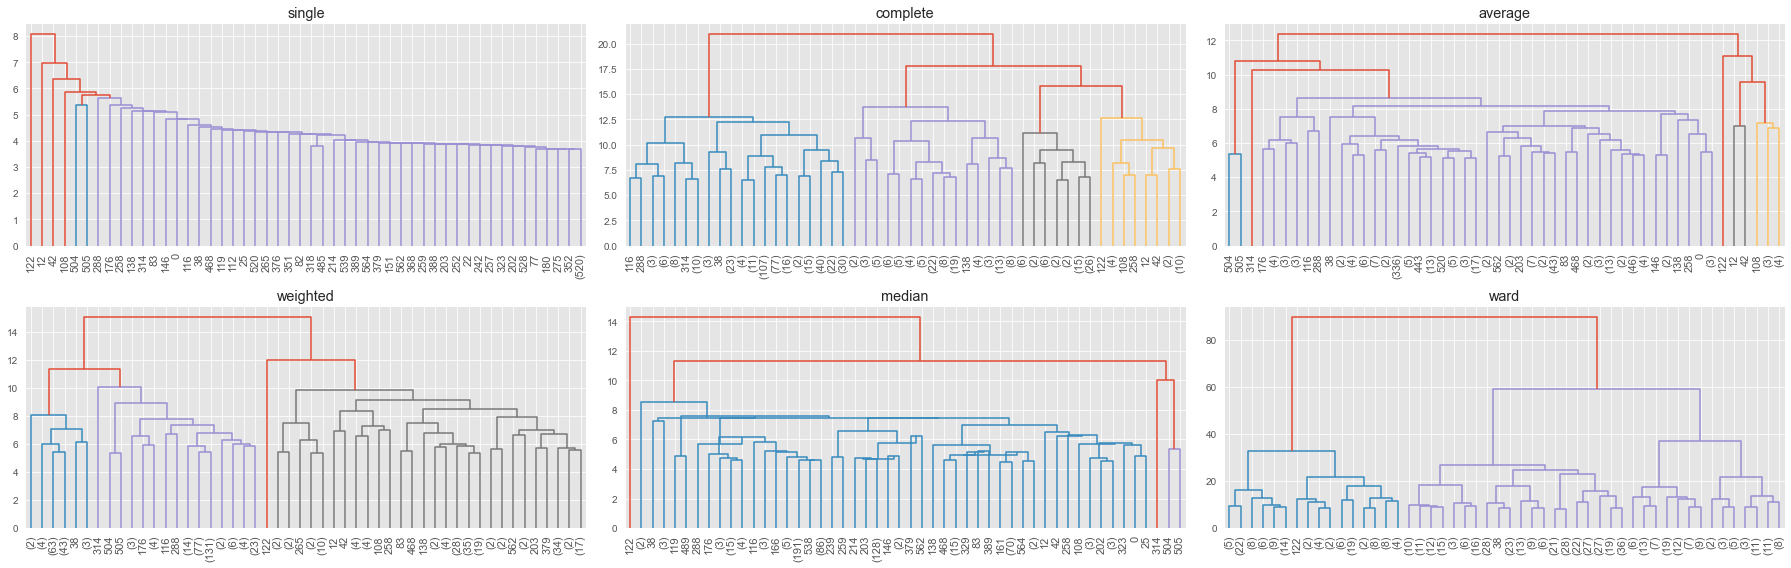

In [169]:
D = df_cleaned_features.values

#ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
methods = ['single','complete','average','weighted','median','ward']


plt.figure(figsize=(25, 8))
for i in range(len(methods)):
  plt.subplot(231+i)
  Z = linkage(D, method=methods[i]) #Perform hierarchical/agglomerative clustering. 
  de = dendrogram(
      Z,
      leaf_rotation=90.,
      leaf_font_size=11.,
      distance_sort='descending',
      truncate_mode = 'lastp',
      p=50
      
  )
  plt.title(methods[i])

plt.tight_layout()

Ward suggests 2 clusters by default (different color)

#### Ward Linkage K = 2

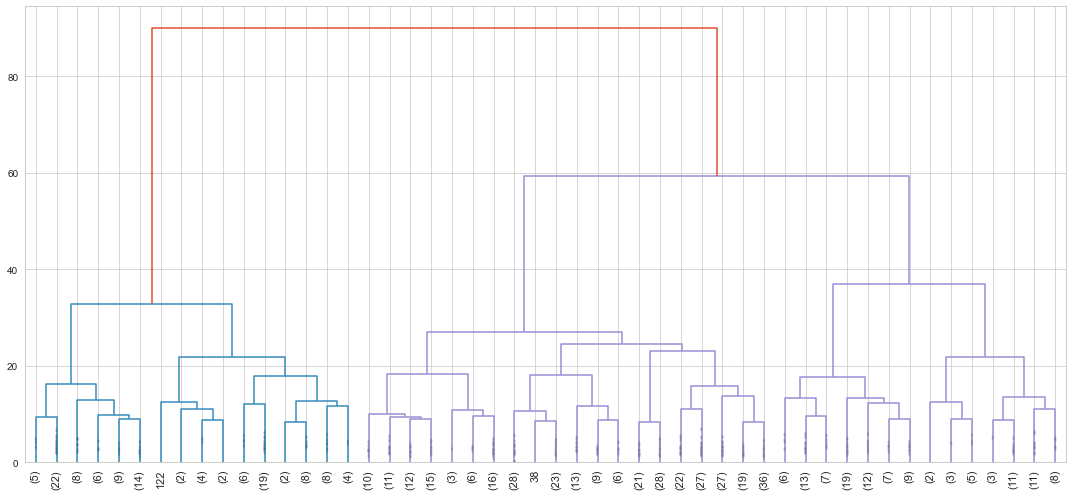

In [170]:
sns.set_style('whitegrid') 
D = df_cleaned_features.values

Z = linkage(D, method='ward', metric='euclidean') #Perform hierarchical/agglomerative clustering. ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged
 
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    distance_sort='descending',
    truncate_mode = 'lastp',
    p=50
)

plt.tight_layout()



the dendrogram function with ward divides the data into 2 groups (it cuts to 70% of the maximum length) by default

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html


centroid:  [516, 79] 	 %items  [21.09, 78.91]


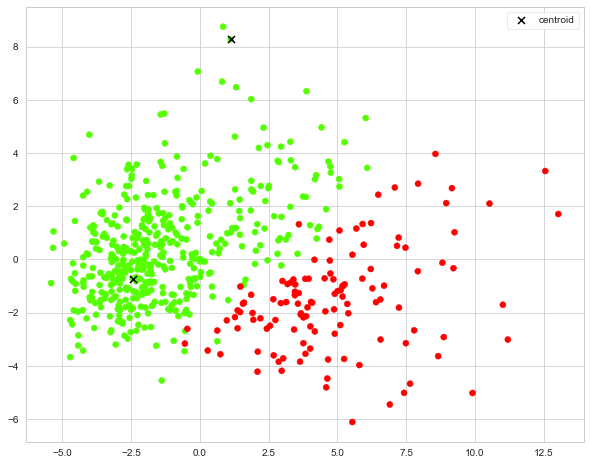

In [171]:
pca_2d = PCA(n_components=2)
X = pca_2d.fit_transform(D)
Y = pdist(D, 'euclidean')
Y = squareform(Y)
Y.shape
k=2
clusters = fcluster(Z, k, criterion='maxclust')
contr, err,centers = getCenter(Y,clusters)
print('centroid: ',centers,'\t %items ',contr)

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[74,0]],[X[504,1], X[74,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid")  # plot points with cluster dependent colors
plt.legend()

plt.show()

In [172]:
noscaled_features =scaler.inverse_transform(df_features.values)# de normalizzo per vedere i valori reali dei centroidi
df_features_noscaled = pd.DataFrame(noscaled_features, index=df_features.index, columns=df_features.columns)
df_features_y =  pd.concat([df_features_noscaled,df_y], axis=1)
print("----------------- Centroide Cluster 1 ----------------- ")
print(df_features_y.iloc[70,:])
print("----------------- Centroide Cluster 2 ----------------- ")
print(df_features_y.iloc[504,:])

----------------- Centroide Cluster 1 ----------------- 
radius_mean                   18.94
texture_mean                  21.31
perimeter_mean                123.6
area_mean                      1130
smoothness_mean             0.09009
compactness_mean             0.1029
concavity_mean                0.108
concave points_mean         0.07951
symmetry_mean                0.1582
fractal_dimension_mean      0.05461
radius_se                    0.7888
texture_se                   0.7975
perimeter_se                  5.486
area_se                       96.05
smoothness_se              0.004444
compactness_se              0.01652
concavity_se                0.02269
concave points_se            0.0137
symmetry_se                 0.01386
fractal_dimension_se       0.001698
radius_worst                  24.86
texture_worst                 26.58
perimeter_worst               165.9
area_worst                     1866
smoothness_worst             0.1193
compactness_worst            0.2336
concavi

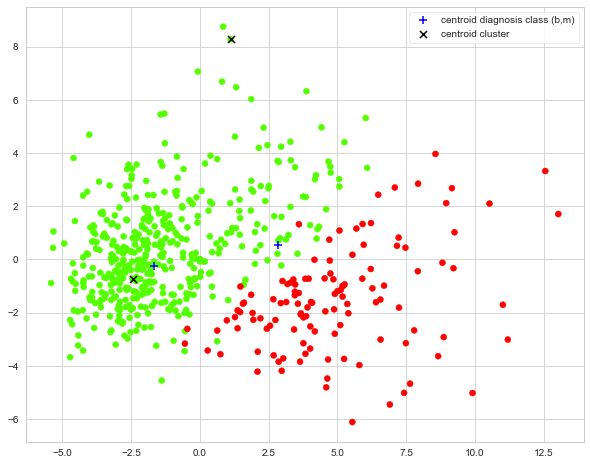

In [173]:
mean_pca_M = pca_2d.transform(df_features_y_clean[ df_features_y_clean['diagnosis']=='M'].mean().values.reshape(1, -1))

mean_pca_B = pca_2d.transform(df_features_y_clean[ df_features_y_clean['diagnosis']=='B'].mean().values.reshape(1, -1))


plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([mean_pca_M[:,0], mean_pca_B[:,0]],[mean_pca_M[:,1], mean_pca_B[:,1]], c='blue', cmap='prism',marker='+',s=50,
            label="centroid diagnosis class (b,m)")  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[74,0]],[X[504,1], X[74,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid cluster")  # plot points with cluster dependent colors

plt.legend()

plt.show()

It is interesting to note how the centroids of the clusters fall very close to the average values of the two classes of tumors (benign and malignant). Therefore It is possible to note that, If we did not have a labeled dataset (with well-defined classes B and M) we would still be able to determine (with good probability) the class of belonging of the dataset elements, through an unsupervised clustering process.

### Ward K=3 (Elbow Method)

Another thing you might see out there is a variant of the "elbow method". It tries to find the clustering step where the acceleration of distance growth is the biggest (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below):

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/


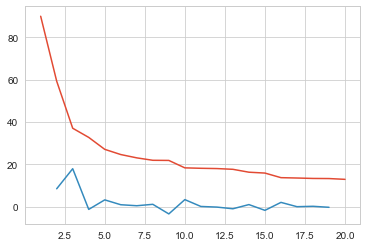

clusters: 3


In [174]:
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

Elbow represented on the blue line corresponds to the maximum acceleration of distance growth (acceleration plotted by the green line) which then identifies the number of clusters in 3.


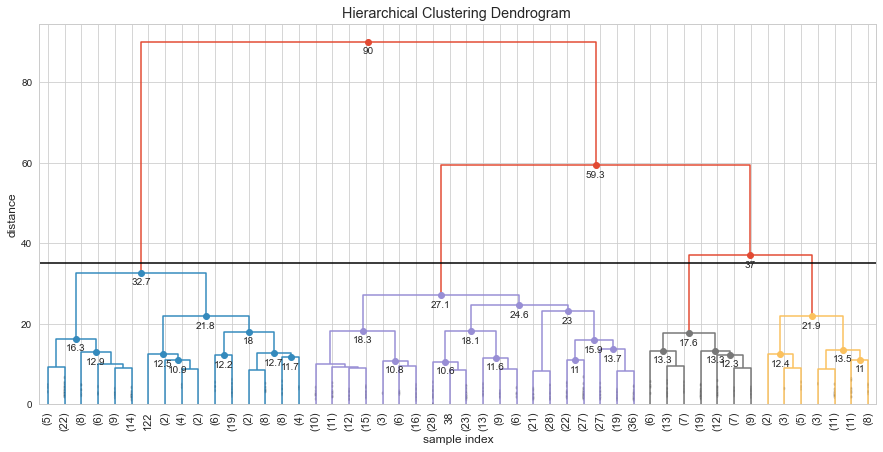

In [175]:
#D = df_features.values

Z = linkage(D, method='ward', metric='euclidean') #Perform hierarchical/agglomerative clustering. ward = Similarity of two clusters is based on the increase in squared error when two clusters are merged

max_d =35.2 #The common practice to flatten dendrograms in $k$ clusters is to cut them off at constant height $k-1$. 
plt.figure(figsize=(15, 7))
fancy_dendrogram(
    Z,
    
    leaf_rotation=90.,
    leaf_font_size=11.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    color_threshold=max_d,
    max_d = max_d,
    distance_sort='descending',
    truncate_mode = 'lastp',
      p=50
)

plt.show()

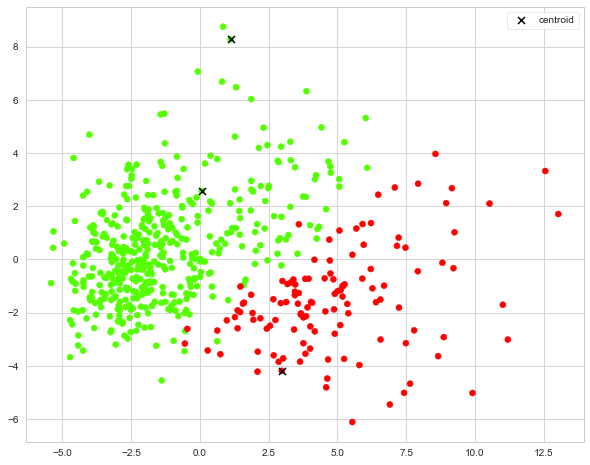

In [176]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.scatter([X[504,0], X[70,0],X[41,0]],[X[504,1], X[70,1],X[41,1]], c='black', cmap='prism',marker='x',s=50,
            label="centroid")  # plot points with cluster dependent colors


plt.legend()

plt.show()


### K Meas

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


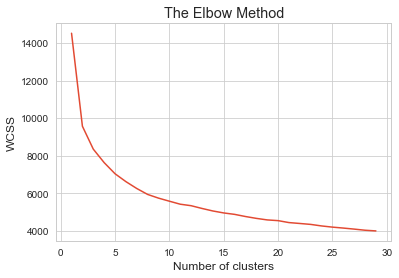

In [177]:
D = df_cleaned_features.values
#D = df_features.values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.34697805896387146


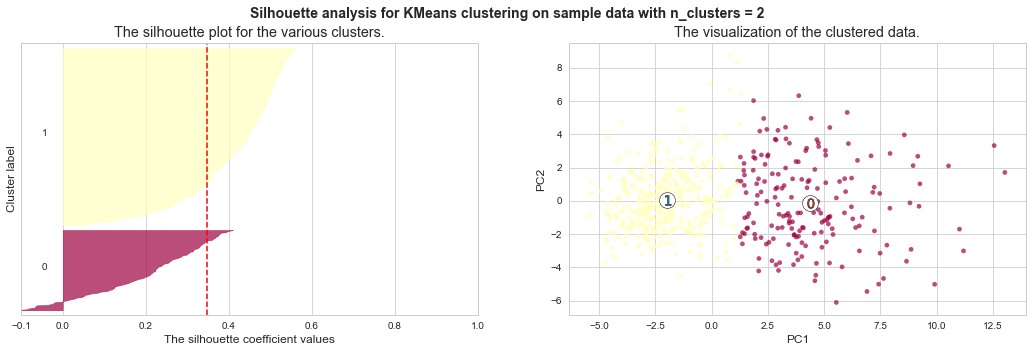

For n_clusters = 3 The average silhouette_score is : 0.2858443346412363


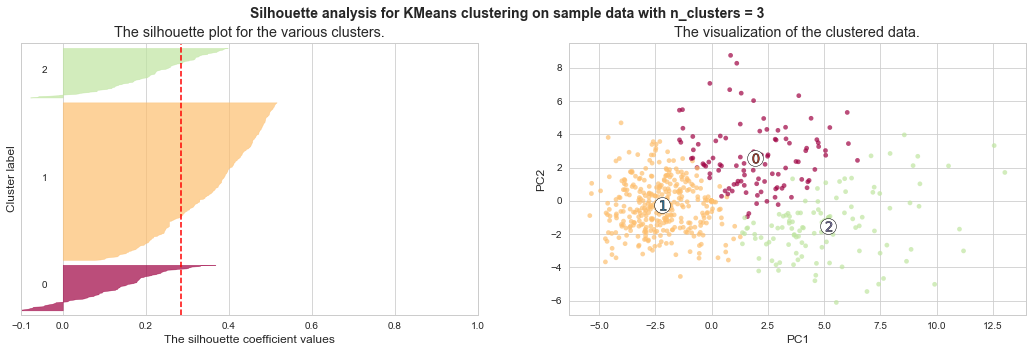

For n_clusters = 4 The average silhouette_score is : 0.1727745462890575


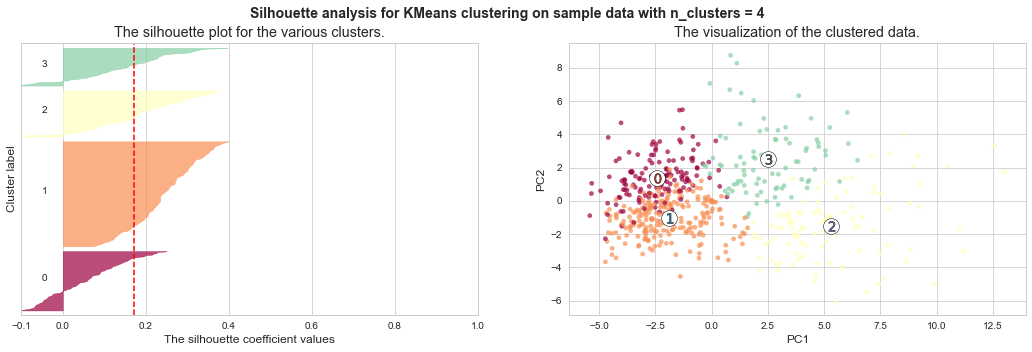

For n_clusters = 5 The average silhouette_score is : 0.16356947111838857


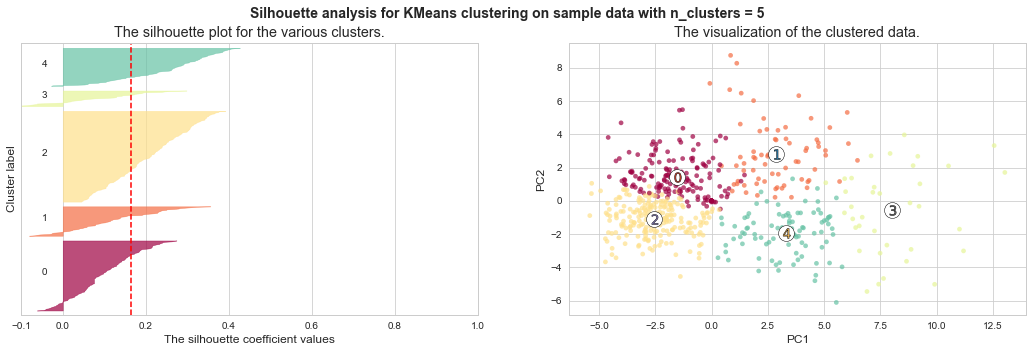

For n_clusters = 6 The average silhouette_score is : 0.15131425533573414


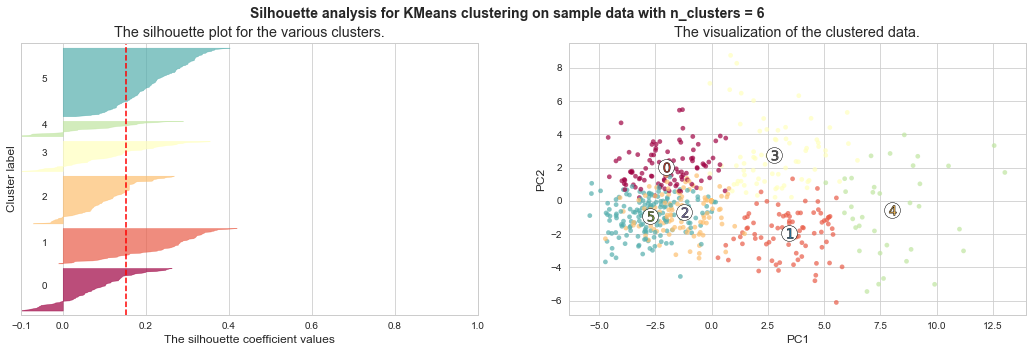

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_cleaned_features.values

range_n_clusters = [2, 3, 4, 5, 6]

pca_2d = PCA(n_components=2)
pca_2d_r = pca_2d.fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=9000)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
#         color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d_r[:, 0], pca_2d_r[:, 1], marker='.', s=90, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = pca_2d.transform(centers)
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In our example, the analysis of the silhouette is used to choose an optimal value for the number of clusters. The silhouette plot shows that a n_clusters value of 5 and 6 is not good because they have clusters with lower than average scores, many negative values and also large fluctuations in the size of the silhouette plot. From the analysis of the silhouette, a good number of k clusters appears to be 2, 3 or 4, since it confirms what has already been expressed by the elbow method applied to hierarchical clustering.